In [238]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (5, 5)
from run_assessment import modeller_score, developer_score
import cPickle
import itertools 
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


/home/qing/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [262]:
def load_pickle(filename):
    with open(filename, 'r') as fin:
        ret = cPickle.load(fin)
    return ret

def compute_score(ground_truth, alignment):
    if alignment is None:
        return None
    keys = ground_truth.keys()
    scores = []
    for id_a, id_b in itertools.permutations(keys, 2):
        struct_align = [ground_truth[id_a], ground_truth[id_b]]
        seq_align = [alignment[id_a], alignment[id_b]]
        dev_scores = []
        mod_scores = []
        sum_scores = []
        try:
            dev_scores.append(developer_score(struct_align, seq_align))
            mod_scores.append(modeller_score(struct_align, seq_align))
            sum_scores.append((dev_scores[-1] + mod_scores[-1])/2.0)
        except ZeroDivisionError:
            return None
    return np.mean(dev_scores), np.mean(mod_scores), np.mean(sum_scores)

def compute_score_batch(ground_truths, alignments):
    scores = [compute_score(g, a) for g, a in zip(ground_truths, alignments)]
    return scores

In [263]:
pasta = load_pickle('../result/pasta.pickle')
mafft = load_pickle('../result/mafft.pickle')
baliphy_10000 = load_pickle('../result/baliphy_10000.pickle')
baliphy_50000 = load_pickle('../result/baliphy_50000.pickle')
baliphy_24h = load_pickle('../result/baliphy_24h.pickle')
baliphy_24h_with_iters = load_pickle('../result/baliphy_24h_with_iterations.pickle')
ground_truth = load_pickle('../result/ground_truth.pickle')

In [264]:
ids = []
with open("../data/bench1.0/bali3pdb/info/ids.txt") as fin:
    for line in fin:
        ids.append(line.strip())    

In [265]:
pasta_scores = compute_score_batch(ground_truth, pasta)

In [266]:
baliphy_10000_scores = compute_score_batch(ground_truth, baliphy_10000)
baliphy_50000_scores = compute_score_batch(ground_truth, baliphy_50000)
baliphy_24h_scores = compute_score_batch(ground_truth, baliphy_24h)

In [267]:
mafft_scores = compute_score_batch(ground_truth, mafft)

In [268]:
pasta_mask = [x is not None for x in pasta_scores]
mafft_mask = [x is not None for x in mafft_scores]
baliphy_10000_mask = [x is not None for x in baliphy_10000_scores]
baliphy_50000_mask = [x is not None for x in baliphy_50000_scores]
baliphy_24_mask = [x is not None for x in baliphy_24h_scores]
baliphy_100000_mask = [d is not None and d[1]==100000 for d in baliphy_24h_with_iters]
mask = [a and b and c and d and e and f for a, b, c, d, e, f in zip(pasta_mask, mafft_mask, baliphy_10000_mask, baliphy_50000_mask, baliphy_24_mask,  baliphy_100000_mask)]

In [269]:
sum(mask)

136

In [270]:
pasta_scores = np.array([y for x, y in zip(mask, pasta_scores) if x])
mafft_scores = np.array([y for x, y in zip(mask, mafft_scores) if x])
baliphy_10000_scores = np.array([y for x, y in zip(mask, baliphy_10000_scores) if x])
baliphy_50000_scores = np.array([y for x, y in zip(mask, baliphy_50000_scores) if x])
baliphy_24h_scores = np.array([y for x, y in zip(mask, baliphy_24h_scores) if x])

In [358]:
ids = [y for x, y in zip(mask, ids) if x]

In [280]:
print(np.mean(baliphy_10000_scores[:, 0]))
print(np.mean(baliphy_50000_scores[:, 0]))
print(np.mean(baliphy_24h_scores[:, 0]))
print(np.mean(mafft_scores[:, 0]))
print(np.mean(pasta_scores[:, 0]))

0.545722627475
0.539514506314
0.530750900962
0.550118276806
0.585739786972


In [281]:
print(np.mean(baliphy_10000_scores[:, 1]))
print(np.mean(baliphy_50000_scores[:, 1]))
print(np.mean(baliphy_24h_scores[:, 1]))
print(np.mean(mafft_scores[:, 1]))
print(np.mean(pasta_scores[:, 1]))

0.615591827023
0.605576691418
0.593258228905
0.575657373827
0.593173960224


In [282]:
print(np.mean(baliphy_10000_scores[:, 2]))
print(np.mean(baliphy_50000_scores[:, 2]))
print(np.mean(baliphy_24h_scores[:, 2]))
print(np.mean(mafft_scores[:, 2]))
print(np.mean(pasta_scores[:, 2]))

0.580657227249
0.572545598866
0.562004564934
0.562887825316
0.589456873598


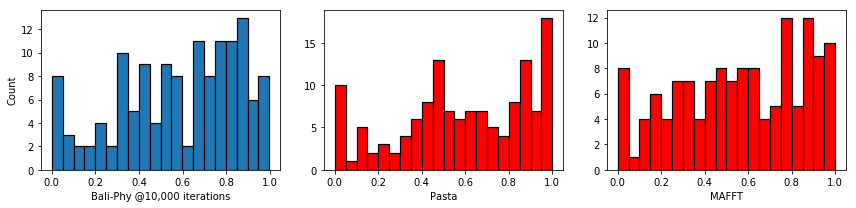

In [349]:
pylab.rcParams['figure.figsize'] = (12, 3)
fig = plt.figure()
#fig.suptitle("Distribution of Combined score", fontsize=12)
plt.subplot(1, 3, 1)
plt.hist(baliphy_10000_scores[:, 2], 20, edgecolor='black', linewidth=1.2)
plt.xlabel('Bali-Phy @10,000 iterations')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(pasta_scores[:, 2], 20, color='r', edgecolor='black', linewidth=1.2)
plt.xlabel('Pasta')

plt.subplot(1, 3, 3)
plt.hist(mafft_scores[:, 2], 20,  color='r', edgecolor='black', linewidth=1.2)
plt.xlabel('MAFFT')
plt.tight_layout()

savefig('fig/dist_comb.png', dpi=300)

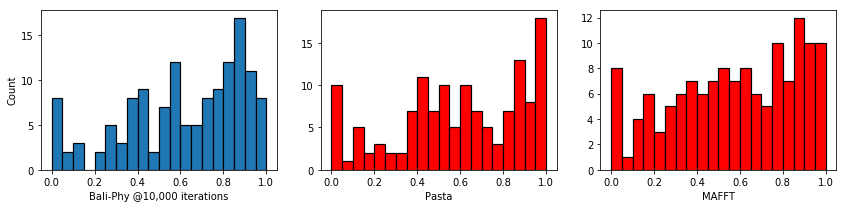

In [347]:
pylab.rcParams['figure.figsize'] = (12, 3)
fig = plt.figure()
#fig.suptitle("Distribution of Combined score", fontsize=12)
plt.subplot(1, 3, 1)
plt.hist(baliphy_10000_scores[:, 1], 20, edgecolor='black', linewidth=1.2)
plt.xlabel('Bali-Phy @10,000 iterations')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(pasta_scores[:, 1], 20, color='r', edgecolor='black', linewidth=1.2)
plt.xlabel('Pasta')

plt.subplot(1, 3, 3)
plt.hist(mafft_scores[:, 1], 20,  color='r', edgecolor='black', linewidth=1.2)
plt.xlabel('MAFFT')
plt.tight_layout()

savefig('fig/dist_mod.png', dpi=300)

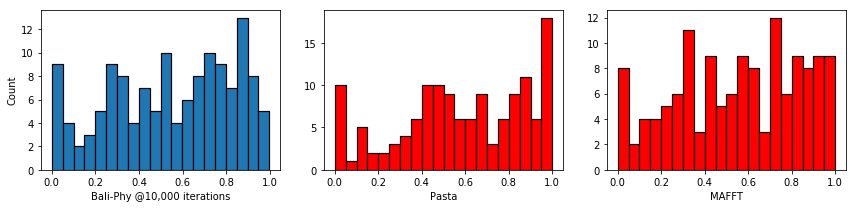

In [348]:
pylab.rcParams['figure.figsize'] = (12, 3)
fig = plt.figure()
#fig.suptitle("Distribution of Combined score", fontsize=12)
plt.subplot(1, 3, 1)
plt.hist(baliphy_10000_scores[:, 0], 20, edgecolor='black', linewidth=1.2)
plt.xlabel('Bali-Phy @10,000 iterations')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(pasta_scores[:, 0], 20, color='r', edgecolor='black', linewidth=1.2)
plt.xlabel('Pasta')

plt.subplot(1, 3, 3)
plt.hist(mafft_scores[:, 0], 20,  color='r', edgecolor='black', linewidth=1.2)
plt.xlabel('MAFFT')
plt.tight_layout()
savefig('fig/dist_dev.png', dpi=300)

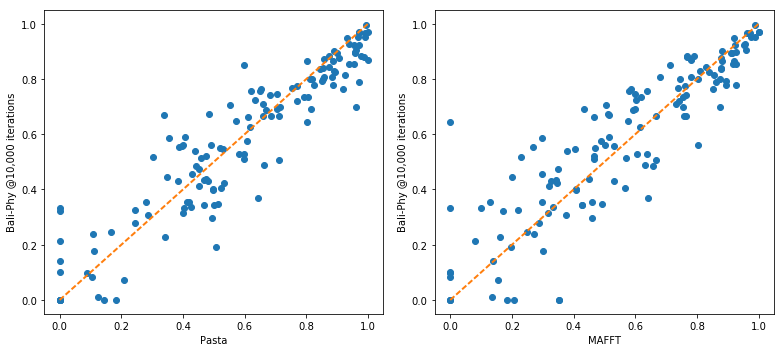

In [350]:
pylab.rcParams['figure.figsize'] = (11, 5)
fig = plt.figure()
#fig.suptitle("Combined Score Comparison", fontsize=12)
plt.subplot(1, 2, 1)
plt.plot(pasta_scores[:, 2], baliphy_10000_scores[:, 2], 'o')
plt.xlabel('Pasta')
plt.ylabel('Bali-Phy @10,000 iterations')

plt.plot([0, 1], [0, 1], '--',linewidth=2.0)
plt.subplot(1, 2, 2)
plt.plot(mafft_scores[:, 2], baliphy_10000_scores[:, 2], 'o')
plt.plot([0, 1], [0, 1], '--',linewidth=2.0)
plt.xlabel('MAFFT')
plt.ylabel('Bali-Phy @10,000 iterations')
plt.tight_layout()
savefig('fig/comp_comb.png', dpi=300)

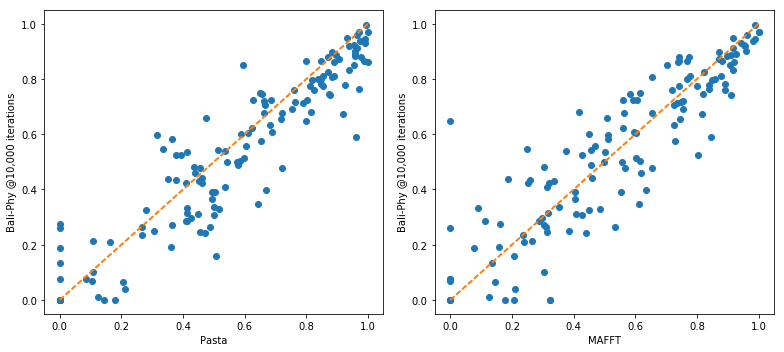

In [352]:
pylab.rcParams['figure.figsize'] = (11, 5)
fig = plt.figure()
#fig.suptitle("Combined Score Comparison", fontsize=12)
plt.subplot(1, 2, 1)
plt.plot(pasta_scores[:, 0], baliphy_10000_scores[:, 0], 'o')
plt.xlabel('Pasta')
plt.ylabel('Bali-Phy @10,000 iterations')

plt.plot([0, 1], [0, 1], '--',linewidth=2.0)
plt.subplot(1, 2, 2)
plt.plot(mafft_scores[:, 0], baliphy_10000_scores[:, 0], 'o')
plt.plot([0, 1], [0, 1], '--',linewidth=2.0)
plt.xlabel('MAFFT')
plt.ylabel('Bali-Phy @10,000 iterations')
plt.tight_layout()
savefig('fig/comp_dev.png', dpi=300)

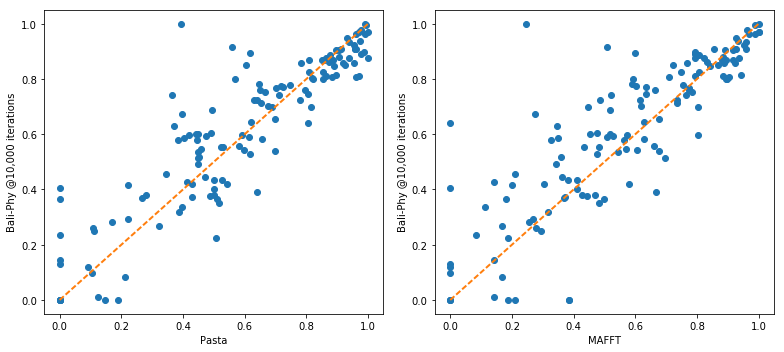

In [353]:
pylab.rcParams['figure.figsize'] = (11, 5)
fig = plt.figure()
#fig.suptitle("Combined Score Comparison", fontsize=12)
plt.subplot(1, 2, 1)
plt.plot(pasta_scores[:, 1], baliphy_10000_scores[:, 1], 'o')
plt.xlabel('Pasta')
plt.ylabel('Bali-Phy @10,000 iterations')

plt.plot([0, 1], [0, 1], '--',linewidth=2.0)
plt.subplot(1, 2, 2)
plt.plot(mafft_scores[:, 1], baliphy_10000_scores[:, 1], 'o')
plt.plot([0, 1], [0, 1], '--',linewidth=2.0)
plt.xlabel('MAFFT')
plt.ylabel('Bali-Phy @10,000 iterations')
plt.tight_layout()
savefig('fig/comp_mod.png', dpi=300)

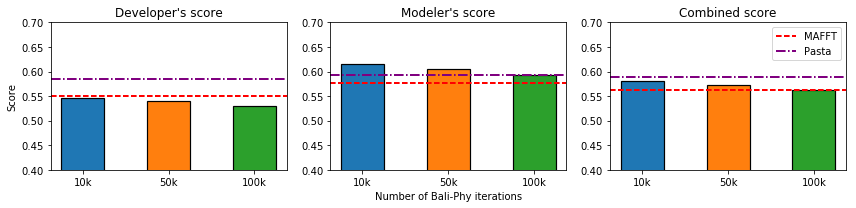

In [351]:
pylab.rcParams['figure.figsize'] = (12, 3)
fig = plt.figure()
#fig.suptitle("Performance of Bali-Phy with Different Number of Iterations", fontsize=12)
plt.subplot(1, 3, 1)
plt.title('Developer\'s score')
plt.bar(1, np.mean(baliphy_10000_scores[:, 0]), 1, edgecolor='black', linewidth=1.2, label='10k iter')
plt.bar(3, np.mean(baliphy_50000_scores[:, 0]), 1, edgecolor='black', linewidth=1.2, label='50k iter')
plt.bar(5, np.mean(baliphy_24h_scores[:, 0]), 1, edgecolor='black', linewidth=1.2, label='100k iter')
plt.xticks((1, 3, 5), ('10k', '50k', '100k'))
plt.ylim([0.4, 0.7])
plt.ylabel('Score')
plt.axhline(np.mean(mafft_scores[:, 0]), linewidth=2, color='red', ls='--')
plt.axhline(np.mean(pasta_scores[:, 0]), linewidth=2, color='purple', ls='-.')


plt.subplot(1, 3, 2)
plt.bar(1, np.mean(baliphy_10000_scores[:, 1]), 1, edgecolor='black', linewidth=1.2, label='10k iter')
plt.bar(3, np.mean(baliphy_50000_scores[:, 1]), 1, edgecolor='black', linewidth=1.2, label='50k iter')
plt.bar(5, np.mean(baliphy_24h_scores[:, 1]), 1, edgecolor='black', linewidth=1.2, label='100k iter')
plt.xticks((1, 3, 5), ('10k', '50k', '100k'))
plt.xlabel('Number of Bali-Phy iterations')
plt.ylim([0.4, 0.7])
plt.title('Modeler\'s score')
plt.axhline(np.mean(mafft_scores[:, 1]), linewidth=2, color='red', ls='--')
plt.axhline(np.mean(pasta_scores[:, 1]), linewidth=2, color='purple', ls='-.')

plt.subplot(1, 3, 3)
plt.bar(1, np.mean(baliphy_10000_scores[:, 2]), 1, edgecolor='black', linewidth=1.2, label='10k iter')
plt.bar(3, np.mean(baliphy_50000_scores[:, 2]), 1, edgecolor='black', linewidth=1.2, label='50k iter')
plt.bar(5, np.mean(baliphy_24h_scores[:, 2]), 1, edgecolor='black', linewidth=1.2, label='100k iter')
plt.xticks((1, 3, 5), ('10k', '50k', '100k'))
plt.ylim([0.4, 0.7])
plt.title('Combined score')
line_up = plt.axhline(np.mean(mafft_scores[:, 2]), linewidth=2, color='red', label='MAFFT', ls='--')
line_down = plt.axhline(np.mean(pasta_scores[:, 2]), linewidth=2, color='purple', label='Pasta', ls='-.')
plt.legend(handles=[line_up, line_down])
plt.tight_layout()
savefig('fig/avg_comp.png', dpi=300)

In [362]:
for bali, mafft, id in zip(baliphy_10000_scores, mafft_scores, ids):
    if bali[1] > 0.9 and mafft[1] < 0.4:
        print bali
        print mafft
        print id

[ 0.03846154  1.          0.51923077]
[ 0.21153846  0.24444444  0.22799145]
BB11002


In [364]:
for id in ids:
    print id
    

BB11001
BB11002
BB11004
BB11008
BB11010
BB11012
BB11015
BB11017
BB11020
BB11021
BB11022
BB11023
BB11024
BB11025
BB11026
BB11027
BB11028
BB11029
BB11032
BB11033
BB11035
BB12001
BB12003
BB12005
BB12006
BB12008
BB12013
BB12014
BB12015
BB12016
BB12017
BB12020
BB12021
BB12022
BB12024
BB12025
BB12026
BB12028
BB12033
BB12035
BB12036
BB12037
BB12038
BB12039
BB12041
BB12043
BB20001
BB20002
BB20003
BB20006
BB20008
BB20010
BB20012
BB20014
BB20016
BB20017
BB20018
BB20020
BB20022
BB20023
BB20025
BB20026
BB20027
BB20028
BB20029
BB20030
BB20031
BB20032
BB20033
BB20034
BB20035
BB20036
BB20038
BB20039
BB20040
BB20041
BB30002
BB30004
BB30006
BB30008
BB30009
BB30010
BB30011
BB30012
BB30014
BB30015
BB30016
BB30017
BB30018
BB30019
BB30020
BB30021
BB30022
BB30024
BB30025
BB30026
BB30027
BB30028
BB30030
BB40002
BB40006
BB40008
BB40011
BB40012
BB40013
BB40014
BB40015
BB40016
BB40017
BB40018
BB40019
BB40022
BB40025
BB40027
BB40028
BB40029
BB40030
BB40033
BB40035
BB40036
BB40037
BB40038
BB40040
BB40042
BB40043


In [365]:
len(ids)

136